# **Tarea Semanal 1**: *Síntesis de Señales*

## Alumna: Salgado, Victoria Jazmín 
### Análisis y Procesamiento de Señales - 2do Cuatrimestre 2025

## **Resumen**

En esta Tarea Semanal se sintetizaron señales de diferente naturaleza para luego experimentar con ellas. Se utilizó el software Spyder mediante WSL. 

## **Introducción**

En este trabajo práctico aparecen, además del desafío de programar la síntesis de señales que no son senoidales, conceptos que relacionan a las señales entre sí reflejando diferentes características. A continuación se realiza una breve descripción de los mismos.

 - **Modulación en amplitud**: La modulación es el proceso de colocar la información contenida en una señal de baja frecuencia en una señal de alta frecuencia, lo que tiene ventajas varias en aplicaciones como radiofonía. La señal de alta frecuencia será la portadora, y la de baja frecuencia la moduladora. Cuando la amplitud de la portadora varía (de acuerdo a la señal moduladora) se trata del método de modulación en amplitud. 

La onda modulada se puede representar matemáticamente como:
$$
(A+B\sin(2\pi\cdot f_b \cdot t))\cdot(\sin(2\pi\cdot f_a \cdot t))
$$

Donde
- $A$ es la amplitud de la señal portadora y $f_a$ su frecuencia

- $B$ es la amplitud de la señal moduladora y $f_b$ su frecuencia


 - **Ortogonalidad entre señales**:
Dos señales serán ortogonales cuando su producto interno sea cero, para señales discretas:
$$
\langle x[n], y[n] \rangle = \sum_{n=0}^{N-1} x[n] y^*[n] = 0 
$$
La interpretación de la ortogonalidad en el dominio del tiempo es que la sumatoria del producto entre las señales para cada n (que se relaciona con dominio temporal) es cero, mientras que en el dominio de la frecuencia puede interpretarse como que los fasores que representan a cada señal son perpendiculares entre sí.

 
- **Correlación Cruzada y Autocorrelación**
La correlación cruzada es una medida de la similitud entre dos señales, como una función del desplazamiento de una con relación a la otra. Puede interpretarse como un producto interno con desplazamiento entre dos señales. Por su naturaleza, es similar a la convolución, con la diferencia de que para ésta última la señal que se desplazará se invierte antes de multiplicar, mientras que en correlación cruzada la señal solo se desplaza y se realiza la multiplicación punto a punto (o se conjuga si tuviera parte impaginaria y luego se realiza el producto).

La autocorrelación es un caso particular de la correlación cruzada, cuando se hace para una señal con respecto a ella misma. Cabe destacar que la función de autocorrelación para m=0 es igual a la energía de la señal. 

La correlación cruzada entre dos señales *x* e *y* finitas se define de manera general como:
 
$$
r_{xy}[m] = \sum_{n=0}^{N-1} x[n] \, y^{*}[n+m]
$$

Para señales reales como las que tratamos en este trabajo la definición será:

$$
r_{xy}[m] = \sum_{n=0}^{N-1} x[n] \, y[n+m]
$$

Y por último se tiene la fórmula de la autocorrelación para una señal *x*:

$$
r_{xx}[m] = \sum_{n=0}^{N-1} x[n] \, x[n+m]
$$

- **Potencia y Energía:**
La energía es la cantidad de trabajo que puede entregar una señal. Se habla de energía en el caso de señales finitas, ya que se puede calcular el total de la misma.
La potencia es un término utilizado para las señales infinitas y refiere a la "velocidad" a la que se entrega la energía de la señal, ya que ésta última sería infinita pero podemos calcular un promedio.
En la práctica, siempre se trabaja con señales finitas en el tiempo, por lo que a las señales que se sintetizará se les calculará la energía
Su formula será:
$$
E_x = \sum_{n=0}^{N-1} |x[n]|^2
$$
Y en este contexto, se calculará la potencia como la energía entregada por muestra como:
$$
E_x = \frac{1}{N} \cdot \sum_{n=0}^{N-1} |x[n]|^2
$$


## **Análisis y Desarrollo**

1) Sintetizar y graficar:

- a) Una señal sinusoidal de 2KHz. 
- b) Misma señal amplificada y desfazada en π/2.
- c) Misma señal modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia.
- d) Señal anterior recortada al 75% de su amplitud.
- e) Una señal cuadrada de 4KHz.
- f) Un pulso rectangular de 10ms.
- g) En cada caso indique tiempo entre muestras, número de muestras y potencia o energía según corresponda.

2) Verificar ortogonalidad entre la primera señal y las demás.

3) Graficar la autocorrelación de la primera señal y la correlación entre ésta y las demás.

Se comenzó por las señales a y b de la siguiente manera

In [304]:
import numpy as np
import matplotlib.pyplot as plt

def mi_funcion_sen(vmax=1, dc=0, ff=1, ph=0, N=1000, fs=1000):
    Ts = 1/fs
    tt = np.arange(0, N*Ts, Ts)
    #print(tt)
    xx = vmax * np.sin(2 * np.pi * ff * tt + ph) + dc
    return tt, xx

# Llamar a la función

#senoidal 2kHz
tt, xx = mi_funcion_sen(vmax=1, dc=0, ff=2000, ph=0, N=1000, fs=400000)

#senoidal 2kHz - amplificada y desfasada en π/2
tt, yy = mi_funcion_sen(vmax=2, dc=0, ff=2000, ph=(np.pi)/2, N=1000, fs=400000)

Se utilizó el generador de funciones senoidales creado en la TS anterior, esta vez eligiendo una $f_f$ de 2kHz y una $f_s$  de 400kHz. De esta manera se cumple con el Teorema de Nyquist (en este caso $f_s$ supera ampliamente a $2 \cdot f_f$), y es posible ver una curva suave cuando se grafique la señal, como se observa a continuación:

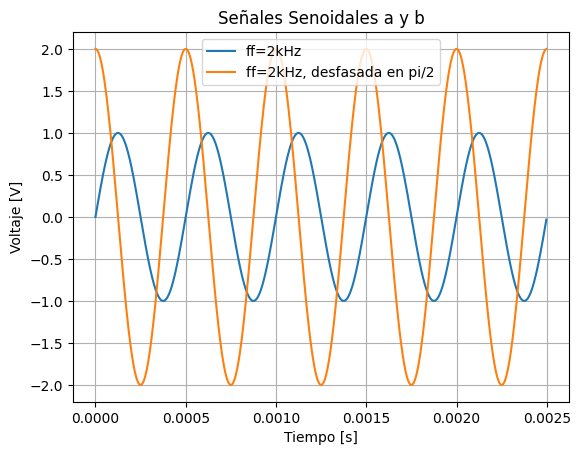

In [305]:
plt.plot(tt, xx, label= 'ff=2kHz')
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltaje [V]')
plt.title('Señales Senoidales a y b')
plt.grid(True)
plt.plot(tt,yy, label= 'ff=2kHz, desfasada en pi/2')
plt.legend()

Se continúa con la síntesis de una señal que actuará como moduladora de la señal 'a', con la mitad de frecuencia (ff=1kHz) y se lleva a cabo la modulación. Según lo pedido se comienza sólo por realizar el producto entre las señales constituyendo un caso especial de modulación en amplitud:

In [306]:
#senoidal 1kHz moduladora
tt, mm = mi_funcion_sen(vmax=1, dc=0, ff=1000, ph=0, N=1000, fs=400000)

#modulacion
nn = xx * mm

Text(0, 0.5, 'Voltaje [V]')

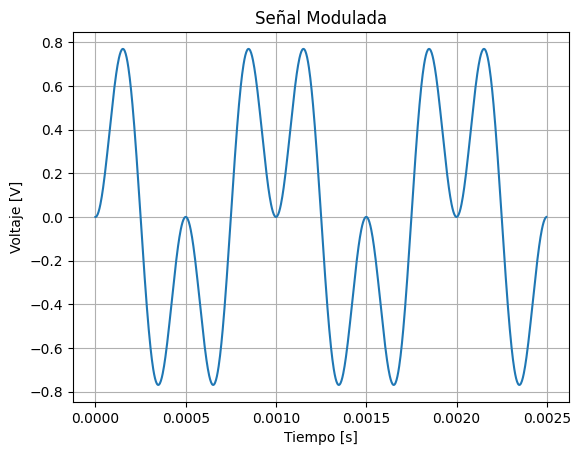

In [307]:
plt.grid(True)
plt.plot(tt, nn)
plt.title('Señal Modulada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltaje [V]')

A continuación un código de prueba para modular en amplitud según la representación matemática

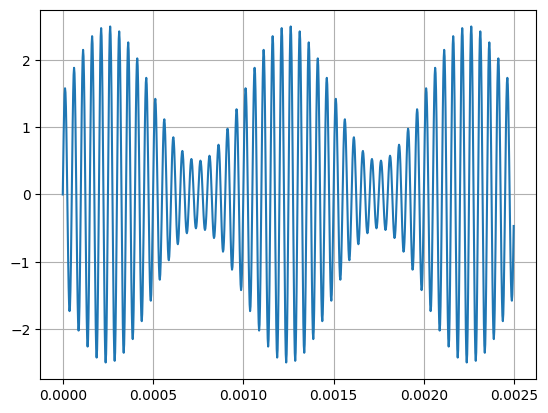

In [335]:
tt, portadora = mi_funcion_sen(vmax=1, dc=0, ff=20000, ph=0, N=1000, fs=400000)

tt, moduladora = mi_funcion_sen(vmax=1, dc=0, ff=1000, ph=0, N=1000, fs=400000)

modulada = portadora * (1.5+moduladora)


plt.grid(True)
plt.plot(tt, modulada, label= 'modulada')


Se calcula debajo la potencia (energía/muestra) de las señales calculadas hasta ahora:

In [309]:
N=1000 
energia_a = (1/N)*(np.sum(np.abs(xx)**2))
print('la potencia de a es =' , energia_a)

energia_b = (1/N)*(np.sum(np.abs(yy)**2))
print('la potencia de b es =' , energia_b)

energia_c = (1/N)*(np.sum(np.abs(nn)**2))
print('la potencia de c es =' , energia_c)

la potencia de a es = 0.5000000000000001
la potencia de b es = 2.0
la potencia de c es = 0.25000000000000006


Luego se procede con la síntesis de la señal *d*, que será la señal original (a) con su amplitud recortada en un 75%. Es decir, la amplitud de la nueva señal sólo podrá alcanzar el 75% del valor original de *a*, manteniendo un valor constante donde *a* supere este umbral. Para esta parte se utiliza la función de numpy "clip". Se establece la amplitud como el parámetro "a" para que el código pueda utilizarse con cualquier valor deseado.

In [310]:
#recorte en amplitud (clipping)
a = 1
a_clipped = a*0.75
clipped = np.clip(xx, -a_clipped, a_clipped)

Text(0.5, 1.0, 'Señal recortada en Amplitud al 75%')

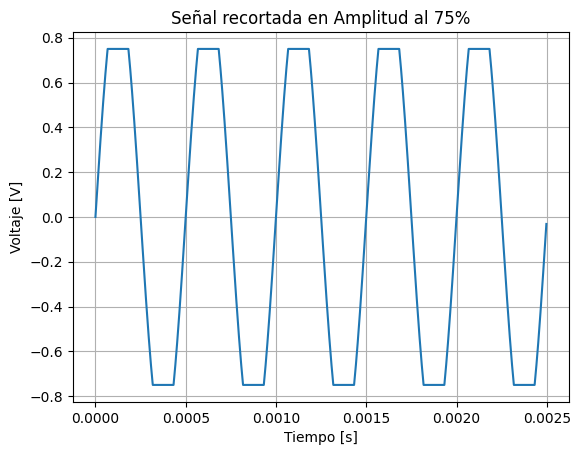

In [311]:
plt.grid(True)
plt.plot(tt, clipped)
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltaje [V]')
plt.title('Señal recortada en Amplitud al 75%')

La señal *e* será una señal cuadrada de frecuencia = 4kHz. Para sintetizarla se utilizó el generador de senoidales, de manera de poder parametrizarla y generar un vector de tiempos igual al anterior. En el caso de la onda cuadrada, interesa quedarse con el signo de la señal senoidal en cada muestra para multiplicarla por la amplitud de la onda, obteniendo un valor constante de Vmax para la mitad del periodo y el mismo valor con signo negativo para la otra mitad, de la siguiente manera:

In [312]:
#Señal cuadrada
def cuadrada(vmax=1, dc=0, ff=2000, ph=0, N=1000, fs=400000):
        Ts = 1/fs
        tc = np.arange(0, N*Ts, Ts)
        cc = vmax * np.sign(np.sin(2 * np.pi * ff * tc + ph) + dc)
        return tc, cc
        
tc, cc = cuadrada(vmax=1, dc=0, ff=4000, ph=0, N=1000, fs=400000)

Text(0, 0.5, 'Voltaje [V]')

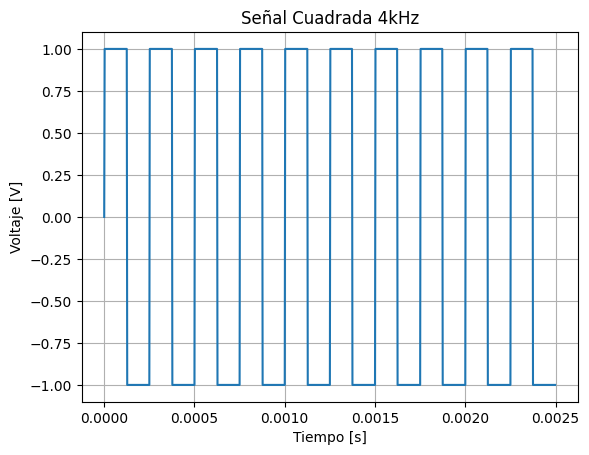

In [313]:
plt.grid(True)
plt.plot(tc,cc)
plt.title('Señal Cuadrada 4kHz')
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltaje [V]')

Para finalizar se sintetiza un pulso de 10ms, que se llamará señal *f*. Sabiendo que el Ts (período de las muestras) será de 1 ms (gracias a la $f_s$ elegida), basta con indicar que la función valdra "1" durante 10 períodos, como se ve a continuación. Se inicializa un vector de tiempos de igual manera que para las señales anteriores, y se comienza por asignar el valor 0 para todo t. Se deja start como parámetro para poder elegir donde poner el pulso.

In [314]:
fs = 1000
Ts = 1/fs
P = 1000
tp = np.arange(0, P*Ts, Ts)
X = np.zeros(P, dtype = int)
start = 200
X [start:start+10] = 1

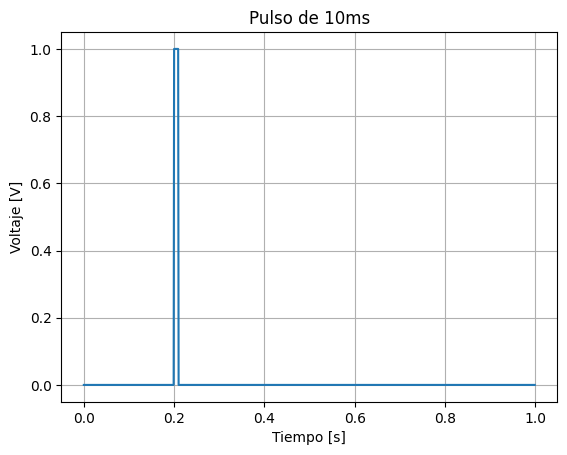

In [315]:
plt.grid(True)
plt.plot(tp, X)
plt.title('Pulso de 10ms')
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltaje [V]')
plt.show()

Debajo se calcula la potencia (energia/muestras) para las últimas señales sintetizadas.

In [316]:
energia_d = (1/N)*(np.sum(np.abs(clipped)**2))
print('la potencia de d es =' , energia_d)

energia_e = (1/N)*(np.sum(np.abs(cc)**2))
print('la potencia de e es =' , energia_e)

energia_f = (1/P)*(np.sum(np.abs(tp)**2))
print('la potencia de f es =' , energia_f)

la potencia de d es = 0.37090032542642337
la potencia de e es = 0.999
la potencia de f es = 0.3328335


Se procede a verificar ortogonalidad entre la señal *a* y las señales restantes, utilizando la siguiente función que luego se invoca con diferentes señales como parámetro:

In [317]:
def ortogonalidad(señal1, señal2, nombre1, nombre2, tolerancia=1e-10):
    producto_interno = np.sum(señal1 * señal2)
    if (producto_interno) < tolerancia:
        print(f"La señal '{nombre1}' y la señal '{nombre2}' son ortogonales. Producto interno = {producto_interno:.2e}")
    else:
        print(f"La señal '{nombre1}' y la señal '{nombre2}' NO son ortogonales. Producto interno = {producto_interno:.2e}")

ortogonalidad(xx, yy, 'a', 'b')
ortogonalidad(xx, nn, 'a', 'c')
ortogonalidad(xx, clipped, 'a', 'd')
ortogonalidad(xx, cc, 'a', 'e')
ortogonalidad(xx, X, 'a', 'f')

La señal 'a' y la señal 'b' son ortogonales. Producto interno = 5.68e-14
La señal 'a' y la señal 'c' NO son ortogonales. Producto interno = 6.79e+01
La señal 'a' y la señal 'd' NO son ortogonales. Producto interno = 4.28e+02
La señal 'a' y la señal 'e' NO son ortogonales. Producto interno = 2.00e+00
La señal 'a' y la señal 'f' NO son ortogonales. Producto interno = 1.40e+00


Los resultados obtenidos son acordes a lo esperado teóricamente. La señal b, que se sintetiza como una senoidal desplazada en $\frac{\pi}{2}
$, es equivalente a una señal cosenoidal con fase igual a cero. Entonces, el producto interno entre *a* y *b* en un intervalo será cero (por ser la función seno y coseno ortogonales por definición). Aunque teóricamente se espera que el producto interno sea exactamente cero, en la práctica se considera una tolerancia de $1 \exp{-10}$ ya que en el cálculo numérico del producto interno se arrastran errores propios del redondeo y del método. 
Por otro lado el resto de las funciones tendrán un producto interno que sobrepasa ampliamente la tolerancia, evidenciando que no son ortogonales con respecto a la señal *a*.

Se continuó por calcular la correlación cruzada entre las señales. 
El primer cálculo corresponderá a autocorrelación, por realizarse la operación para la señal *a* consigo misma.
Se utilizó la función "correlate" de la librería numpy y se graficó para cada caso.

In [318]:
autocorrelacion = np.correlate(xx, xx, mode='full')
cruzada_1 = np.correlate(xx, yy, mode = 'full')
cruzada_2 = np.correlate(xx, nn, mode = 'full')
cruzada_3 = np.correlate(xx, clipped, mode = 'full')
cruzada_4 = np.correlate(xx, cc , mode = 'full')
cruzada_5 = np.correlate(xx, X, mode = 'full')

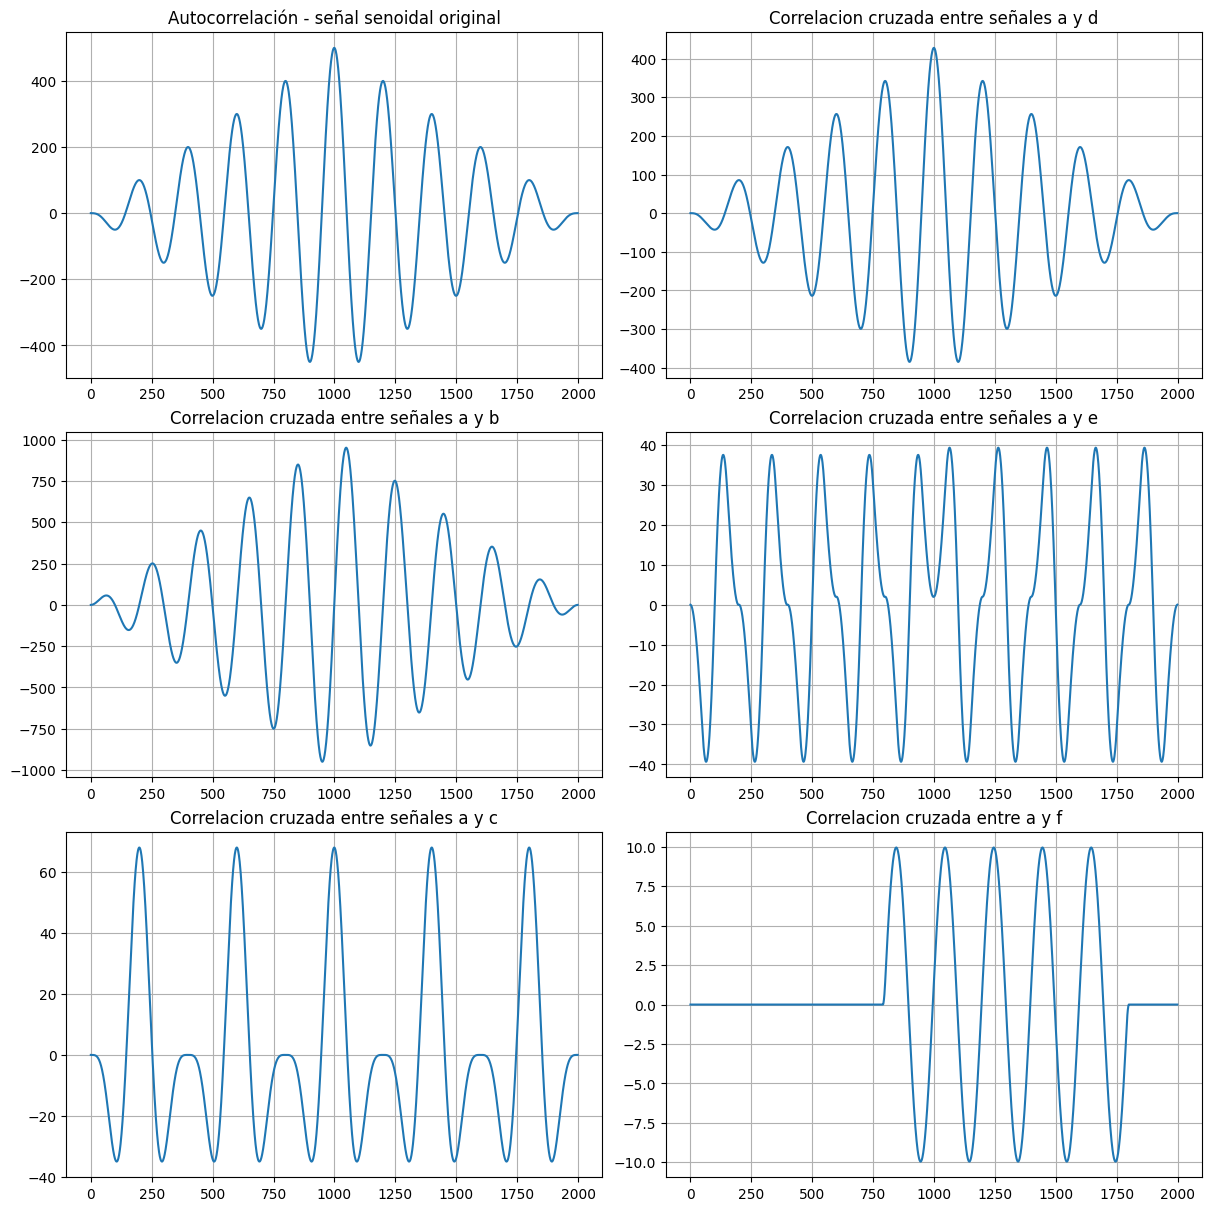

In [319]:
fig, axs = plt.subplots(3, 2, figsize=(12, 12), constrained_layout=True)  

axs[0, 0].plot(autocorrelacion)
axs[0, 0].set_title('Autocorrelación - señal senoidal original')
axs[0, 0].grid(True)

axs[1, 0].plot(cruzada_1)  
axs[1, 0].set_title('Correlacion cruzada entre señales a y b' )
axs[1, 0].grid(True)

axs[2, 0].plot(cruzada_2)  
axs[2, 0].set_title('Correlacion cruzada entre señales a y c')
axs[2, 0].grid(True)

axs[0, 1].plot(cruzada_3) 
axs[0, 1].set_title('Correlacion cruzada entre señales a y d')
axs[0, 1].grid(True)

axs[1, 1].plot(cruzada_4)  
axs[1, 1].set_title('Correlacion cruzada entre señales a y e')
axs[1, 1].grid(True)

axs[2, 1].plot(cruzada_5)  
axs[2, 1].set_title('Correlacion cruzada entre a y f')
axs[2, 1].grid(True)

4)  Dada la siguiente propiedad trigonométrica:
$$
2\sin(\alpha)\sin(\beta)=\cos(\alpha-\beta)-\cos(\alpha+\beta)
$$

- Demostrar la igualdad
- Mostrar que la igualdad se cumple con señales sinosoidales, considerando α=ω⋅t el doble de β (Use la frecuencia que desee).

Demostración de la igualdad:
Se realiza utilizando la definición de seno con exponenciales complejas y la fórmula de Euler. 
También se utilizan las propiedades de paridad de las funciones trigonométricas seno y coseno:
 
Por ser el coseno una función **par** se cumple que:
$$
\cos(\alpha)=\cos(-\alpha)
$$

Y para el seno, por ser una función **impar** se cumple que:
$$
\sin(-\alpha)=-\sin(\alpha)
$$


In [320]:
from IPython.display import IFrame

IFrame(src='Demostracion Id TRIGONOMETRICA.pdf', width=700, height=400)

Para mostrar que la igualdad se cumple con señales senoidales, se elige una frecuencia angular $\omega$ = 1 rad/s. 
Entonces $\alpha$ = 1 [rad/s] * t[s] = $t$ y $\beta=\alpha/2 = 1 [rad/s] * t[s] * 1/2 = \frac{t}{2} $

De esta forma la igualdad quedaría
$$
2\sin(t)\sin(\frac{t}{2})=\cos(t-\frac{t}{2})-\cos(t+\frac{t}{2})
$$

Y una forma de verificar la igualdad es graficar ambos lados de la ecuación como funciones diferentes. 
Entonces:




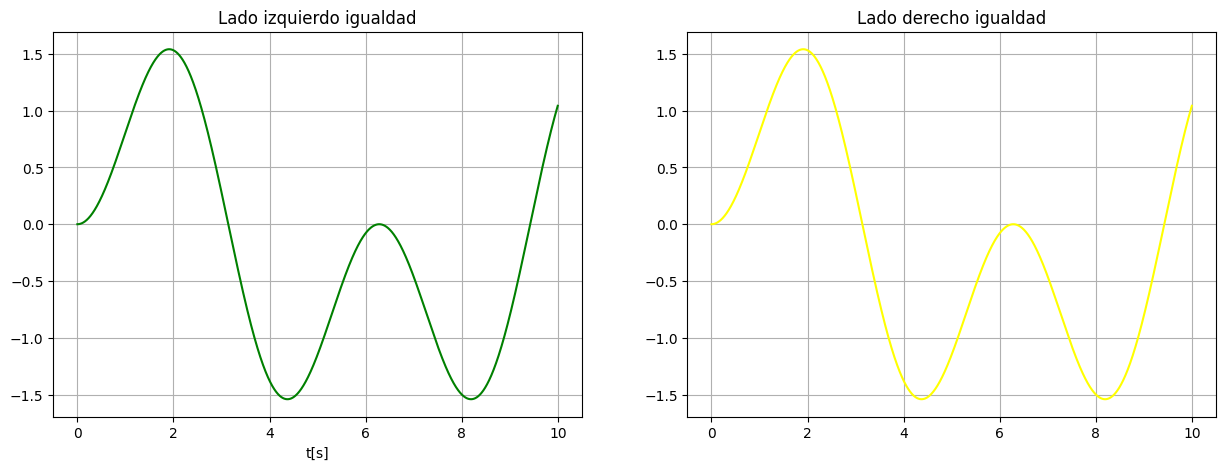

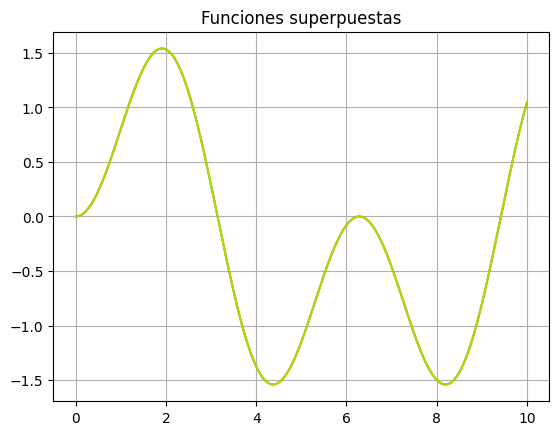

In [321]:
tf = 10
tiempo = np.arange(0, tf, 0.001)

x = 2*np.sin(tiempo)*np.sin(tiempo/2)
y = np.cos(tiempo-tiempo/2)-np.cos(tiempo+tiempo/2)

plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(tiempo,x, color="green" )
plt.grid(True)
plt.title("Lado izquierdo igualdad")
plt.xlabel('t[s]')

plt.subplot(1,2,2)
plt.plot(tiempo, y, color="yellow")
plt.grid(True)
plt.title("Lado derecho igualdad")

plt.figure(2)
plt.plot(tiempo, x, color="green")
plt.plot(tiempo, y, color="yellow", alpha=0.7)
plt.grid(True)
plt.title("Funciones superpuestas")

plt.show()

De esta forma podemos ver claramente que las funciones se superponen de manera exacta, por lo que se cumple la igualdad para la frecuencia angular elegida y la relación entre $\alpha$ y $\beta$. :)

## **Ejercicio Bonus**

Consigna: Bajar un archivo en formato .wav desde freesound.org, graficarlo y calcular su energía. 

WAV es un formato de audio caracterizado por no estar comprimido, manteniendo así la resolución de la grabación original y evitando la pérdida de datos de la señal. 

En este caso, se eligió un archivo correspondiente a latidos cardíacos. 

Para esta parte fue necesario importar la librería de Python "wave". 


In [322]:
import wave as wv

Una característica importante y muy interesante de los archivos WAV es que la información viene codificada de manera binaria y con una estructura determinada. El archivo comienza con un *header* que contiene la metadata, es decir, indica cómo se interpretará la secuencia de *frames* que seguirán. 

Cada frame en un .WAV contiene una cantidad de canales determinado que corresponde a las salidas (en, por ejemplo, parlantes derecho e izquierdo). A su vez (para cada canal) cada muestra tiene un valor numérico que corresponde a la amplitud de la señal en ese punto en el tiempo. 

Los parámetros que podemos obtener de la metadata del .wav que serán de interés en este caso serán: 

- La cantidad de canales
- Frame Rate: es la frecuencia de sampleo; es decir cuantos frames se tienen por segundo [Hz]. Cabe destacar que este parámetro tendrá un efecto directo en la calidad del audio percibida. Si es muy bajo, la reconstrucción de la señal no será buena. Un dato interesante es que generalmente esta frecuencia es de 44100Hz, lo que es un poco más del doble que la frecuencia más alta que el ser humano puede percibir (~20kHz). Es decir que cumple con el teorema de Nyquist-Shannon para evitar *Aliasing*.
- Bit Depth: Iindica cuántos bits ocupará cada muestra. Cuanto mayor sea, podrá contener un número más grande de amplitudes diferentes, lo que resultará en un rango dinámico mayor y una fidelidad de audio más alta.

Conociendo lo que compone al archivo .WAV se procede, mediante las funciones de la librería wave, a recuperar la información necesaria:

In [323]:
corazon = wv.open("latidos_corazon.wav", 'rb')

frecuencia = corazon.getframerate()
F = corazon.getnframes()

canales = corazon.getnchannels()
print('cantidad de canales:', canales)

print('cantidad de frames:', F)
print('frecuencia de muestreo [Hz]:', frecuencia)

bytes_por_muestra = corazon.getsampwidth()
print('bytes por muestra:', bytes_por_muestra)  

cantidad de canales: 2
cantidad de frames: 537039
frecuencia de muestreo [Hz]: 44100
bytes por muestra: 2


Para graficar la señal, es necesario un vector de tiempos, donde con cada tiempo se corresponda un valor numérico que representa la amplitud, como se explicó anteriormente. 
Se obtiene entonces el período entre muestras como la inversa de la frecuencia de sampleo obtenida anteriormente y se diseña el arrange de tiempos para que vaya desde tiempo 0 hasta F*Ts (donde F es la cantidad de frames) con un paso igual al perído de sampleo.

In [324]:
Ts = 1/frecuencia
vt = np.arange(0, F*Ts, Ts)

Luego se procede a leer cada frame, guardando la información en un array. Mediante la función *np.frombuffer* se pide interpretar este array obtenido como bloques de 16 bits. Ésto último proviene de que se obtuvo que cada muestra (para cada canal) contiene 2 bytes de información, es decir 16 bits. Lo que se está haciendo es segmentar la información obtenida para poder interpretarla.

In [325]:
frames_raw = corazon.readframes(corazon.getnframes())
signal = np.frombuffer(frames_raw, dtype=np.int16)

Y luego, para poder graficar, es necesario separar las muestras según a qué canal pertenecen (si no, para un mismo tiempo tendría dos valores diferentes que no sería posible graficar a menos que superponga para un frame el valor de cada uno de sus canales).

La codificación estandar para sonido estéreo es L,R,L,R... por lo que se separan las muestras según número de muestra par o impar de la siguiente manera:

In [326]:
canal_izq = signal[0::2]  #toma muestras pares: 0, 2,...
canal_der = signal[1::2]  #muestras impares, comenzando por el 1 y cada 2

Y se finaliza por graficar toda esta información. 
Como última observacion, cabe destacar que en este caso en el eje **y** se grafica el valor numérico (pasado de binario a decimal) de la muestra, es decir que no tiene exactamente una interpretación física como volts. 
Para facilitar la lectura e interpretar una amplitud relativa, se normaliza por el valor máximo que puede tomar la señal, que se calculará como $2^{15}$ = 32768 (por ser un signed int de 16 bits con rango de $-2^{15}$ a $2^{15}-1$). 

In [327]:
canal_izq_normalizado = canal_izq / 32768
canal_der_normalizado = canal_der / 32768

Grafico:

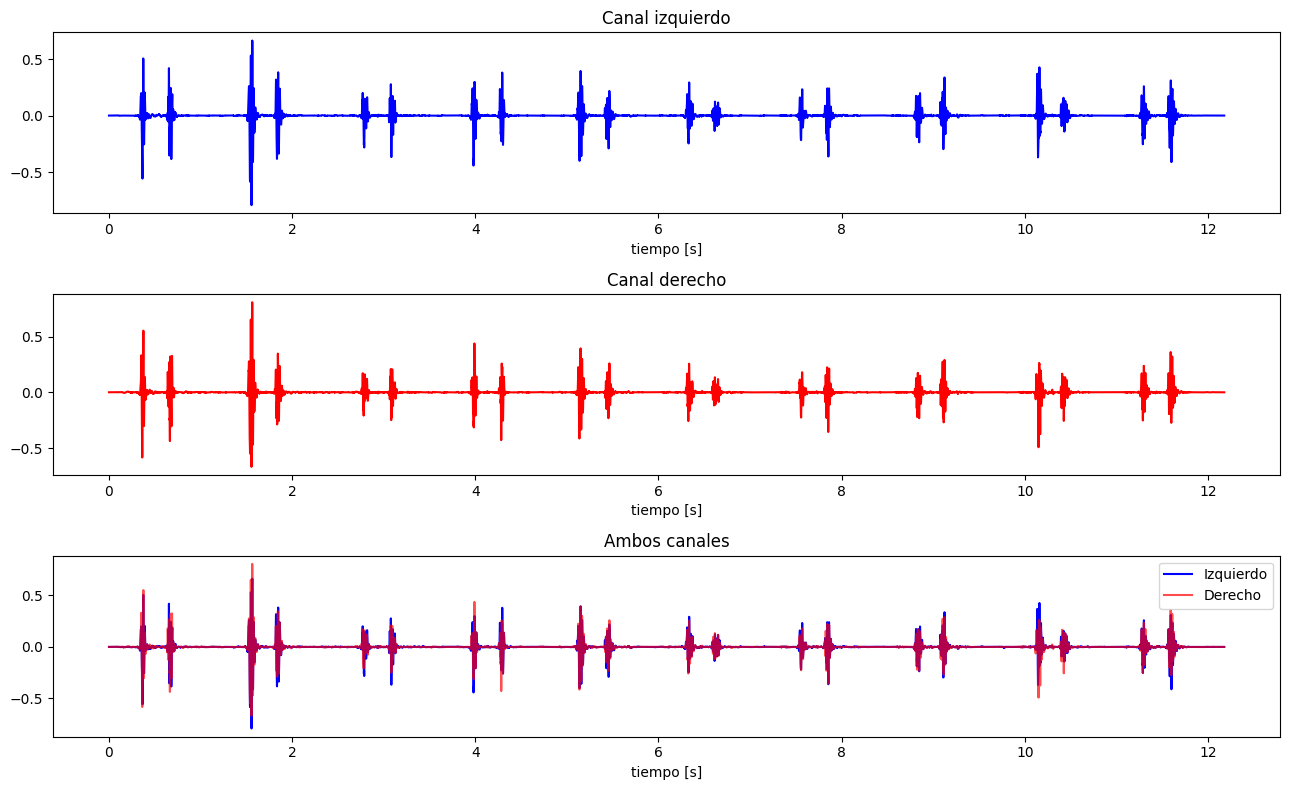

In [328]:
plt.figure(figsize=(13, 8))

# Canal izquierdo
plt.subplot(3, 1, 1)
plt.plot(vt, canal_izq_normalizado, color="blue")
plt.title("Canal izquierdo")
plt.xlabel("tiempo [s]")

# Canal derecho
plt.subplot(3, 1, 2)
plt.plot(vt, canal_der_normalizado, color="red")
plt.title("Canal derecho")
plt.xlabel("tiempo [s]")

# L y R
plt.subplot(3, 1, 3)
plt.plot(vt, canal_izq_normalizado, label="Izquierdo", color="blue")
plt.plot(vt, canal_der_normalizado, label="Derecho", color="red", alpha=0.7)
plt.title("Ambos canales")
plt.xlabel("tiempo [s]")
plt.legend()

plt.tight_layout()
plt.show()


Se finaliza con el cálculo de la energía de la señal del canal izquierdo, por tomar un ejemplo.

In [329]:
energia = np.sum(canal_izq**2)
print('Energía total (canal izquierdo):', energia)

corazon.close()


Energía total (canal izquierdo): 999061681


## **Conclusiones**

Se logró llevar a cabo todas las consignas de la Tarea Semanal y se observaron los fenómenos esperados. 

## **Autoevaluación del Aprendizaje**

*Resolví la tarea con seguridad*

*¿Qué aprendiste al hacer esta tarea?*
Me ayudó a comprender los conceptos teóricos y me pareció muy interesante para investigar temas que no conocía antes.

*¿Qué te quedó claro? ¿Qué te sigue costando?*
Me quedó todo bastante claro, lo que aún me cuesta un poco terminar de comprender es la diferencia entre potencia y energía y para qué señales debo usar cada una. 

*Indicar si se utilizó IA:*

Sí, usé chatGPT y Gemini.

*En caso afirmativo, indicar una opción o varias:*
Utilicé inteligencia artificial para saber como se codean en Python algunas cosas (nunca había usado Python antes de esta materia), para pasar a LaTex algunas de las expresiones matemáticas (ya que tampoco había usado este lenguaje antes) y para terminar de comprender algunos conceptos teóricos.

## **Bibliografía**
- https://realpython.com/python-wav-files/#decipher-the-pcm-encoded-audio-samples
- https://en.wikipedia.org/wiki/Cross-correlation
- http://tupdigital.web.unq.edu.ar/wp-content/uploads/sites/43/2018/12/am-1.pdf